In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import models, layers


In [ ]:
import os
os.chdir('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita')

# Prepocessing

In [ ]:
#bawal putih
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Bawal Putih ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#belato
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Belato')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cakalang
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Cakalang')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gembolo
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Gembolo')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gole-gole
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Gole Gole')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kakap merah
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kakap Merah ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kembung
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kembung ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kerapu
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kerapu')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tenggiri
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Tenggiri')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tuna
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Tuna')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath              Label
0  /content/drive/MyDrive/BANGKIT 2023/Data Menta...       Ikan Gembolo
1  /content/drive/MyDrive/BANGKIT 2023/Data Menta...        Ikan Kerapu
2  /content/drive/MyDrive/BANGKIT 2023/Data Menta...  Ikan Kakap Merah

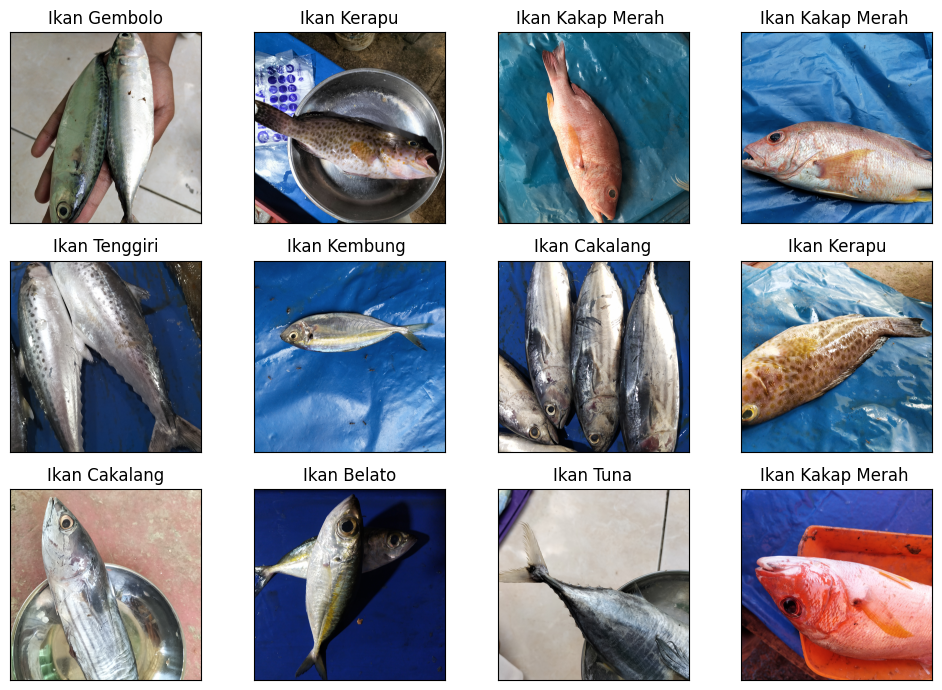

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

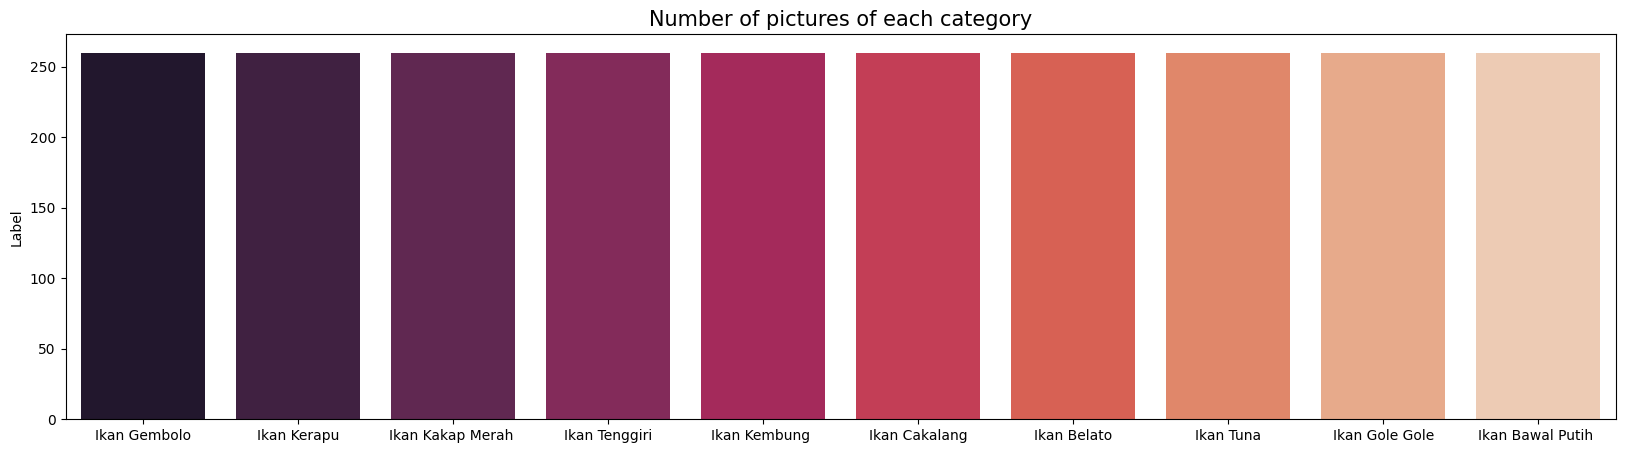

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

#test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

val_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )
# test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
#                                         x_col='Filepath',
#                                         y_col='Label',
#                                          seed=0,
#                                          target_size=(416,416),
#                                          batch_size=16,
#                                          shuffle=False,
#                                          class_mode = 'categorical',
#                                          )

Found 2080 validated image filenames belonging to 10 classes.
Found 520 validated image filenames belonging to 10 classes.


# Model Parameter

In [ ]:
batch_size = 16
EPOCHS = 10
WARMUP_EPOCHS = 2
LEARNING_RATE = 0.001
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 224
WIDTH = 224
CANAL = 3
N_CLASSES = 10
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5

In [ ]:
from keras import Model, Input
input_shape = (224,224,3)
model_input = Input(shape=input_shape)

# Modelling & Training ResNet-50




In [ ]:
IMG_SHAPE = (224, 224, 3)
import tensorflow as tf
from tensorflow.keras.applications import resnet50
base_model_resnet50 =resnet50.ResNet50(weights='imagenet',
                                       include_top=False,
                                       input_shape=IMG_SHAPE)
x_resnet50 =tf.keras.layers.GlobalAveragePooling2D()(base_model_resnet50.output)
x_resnet50 =tf.keras.layers.Dropout(0.15)(x_resnet50)
x_resnet50 =tf.keras.layers.Dense(256, activation='relu')(x_resnet50)
x_resnet50 =tf.keras.layers.Dropout(0.15)(x_resnet50)
final_output_resnet50 =tf.keras.layers.Dense(N_CLASSES, activation='softmax', name='final_output_resnet50')(x_resnet50)
model_resnet50 =tf.keras.models.Model(inputs=base_model_resnet50.inputs,outputs=final_output_resnet50)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model_resnet50.layers:
    layer.trainable = False

for i in range(-5, 0):
    model_resnet50.layers[i].trainable = True

metric_list = ["accuracy"]
optimizer =tf.keras.optimizers.Adam(lr=WARMUP_LEARNING_RATE)
model_resnet50.compile(optimizer=optimizer, loss="categorical_crossentropy",  metrics=metric_list)
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
import time

start = time.time()

STEP_SIZE_TRAIN = train_data.n//train_data.batch_size
STEP_SIZE_VALID = val_data.n//val_data.batch_size

history_warmup_r50 = model_resnet50.fit(train_data,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=val_data,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=WARMUP_EPOCHS,
                                     verbose=2)

end = time.time()
print('Waktu Training:', end - start)

Epoch 1/2
130/130 - 1113s - loss: 2.3961 - accuracy: 0.1072 - val_loss: 2.3027 - val_accuracy: 0.1309 - 1113s/epoch - 9s/step
Epoch 2/2
130/130 - 467s - loss: 2.3156 - accuracy: 0.1043 - val_loss: 2.2989 - val_accuracy: 0.1738 - 467s/epoch - 4s/step
Waktu Training: 1588.720393896103


In [ ]:
for layer in model_resnet50.layers:
  layer.trainable = True

es =tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es]
optimizer =tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model_resnet50.compile(optimizer=optimizer, loss="categorical_crossentropy",  metrics=metric_list)
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history_finetunning_r50 = model_resnet50.fit(train_data,
                                          steps_per_epoch=STEP_SIZE_TRAIN,
                                          validation_data=val_data,
                                          validation_steps=STEP_SIZE_VALID,
                                          epochs=EPOCHS,
                                          callbacks=callback_list,
                                          verbose=1).history

Epoch 1/10
130/130 [==============================] - 596s 4s/step - loss: 2.0006 - accuracy: 0.3260 - val_loss: 5.4374 - val_accuracy: 0.0996
Epoch 2/10
130/130 [==============================] - 532s 4s/step - loss: 1.5334 - accuracy: 0.4740 - val_loss: 2.3652 - val_accuracy: 0.0957
Epoch 3/10
130/130 [==============================] - 540s 4s/step - loss: 1.2667 - accuracy: 0.5639 - val_loss: 5.0572 - val_accuracy: 0.0938
Epoch 4/10
130/130 [==============================] - 478s 4s/step - loss: 0.9969 - accuracy: 0.6731 - val_loss: 2.7395 - val_accuracy: 0.0996
Epoch 5/10
130/130 [==============================] - 483s 4s/step - loss: 0.8282 - accuracy: 0.7221 - val_loss: 9.4610 - val_accuracy: 0.1270
Epoch 6/10
130/130 [==============================] - 476s 4s/step - loss: 0.6580 - accuracy: 0.7861 - val_loss: 3.6024 - val_accuracy: 0.1211
Epoch 7/10
130/130 [==============================] - 528s 4s/step - loss: 0.5901 - accuracy: 0.7986 - val_loss: 4.6870 - val_accuracy: 0.1270

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
#display
display_training_curves(
    history_finetunning_r50.history['loss'],
    history_finetunning_r50.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_finetunning_r50.history['accuracy'],
    history_finetunning_r50.history['val_accuracy'],
    'accuracy', 212)

# Evaluation dan Prediction

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = model_resnet50.predict(val_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

33/33 [==============================] - 87s 3s/step
The first 10 predictions: ['Ikan Cakalang', 'Ikan Cakalang', 'Ikan Cakalang', 'Ikan Gembolo', 'Ikan Cakalang', 'Ikan Cakalang', 'Ikan Cakalang', 'Ikan Cakalang', 'Ikan Cakalang', 'Ikan Cakalang']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

Ikan Bawal Putih        0.00      0.00      0.00        56
      Ikan Belato       0.00      0.00      0.00        54
    Ikan Cakalang       0.10      0.96      0.18        53
     Ikan Gembolo       0.00      0.00      0.00        58
   Ikan Gole Gole       0.00      0.00      0.00        56
Ikan Kakap Merah        0.00      0.00      0.00        48
    Ikan Kembung        0.00      0.00      0.00        49
      Ikan Kerapu       0.00      0.00      0.00        44
    Ikan Tenggiri       0.00      0.00      0.00        46
        Ikan Tuna       0.00      0.00      0.00        56

         accuracy                           0.10       520
        macro avg       0.01      0.10      0.02       520
     weighted avg       0.01      0.10      0.02       520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


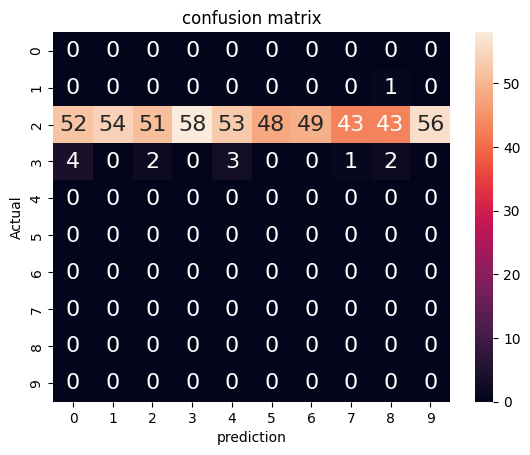

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

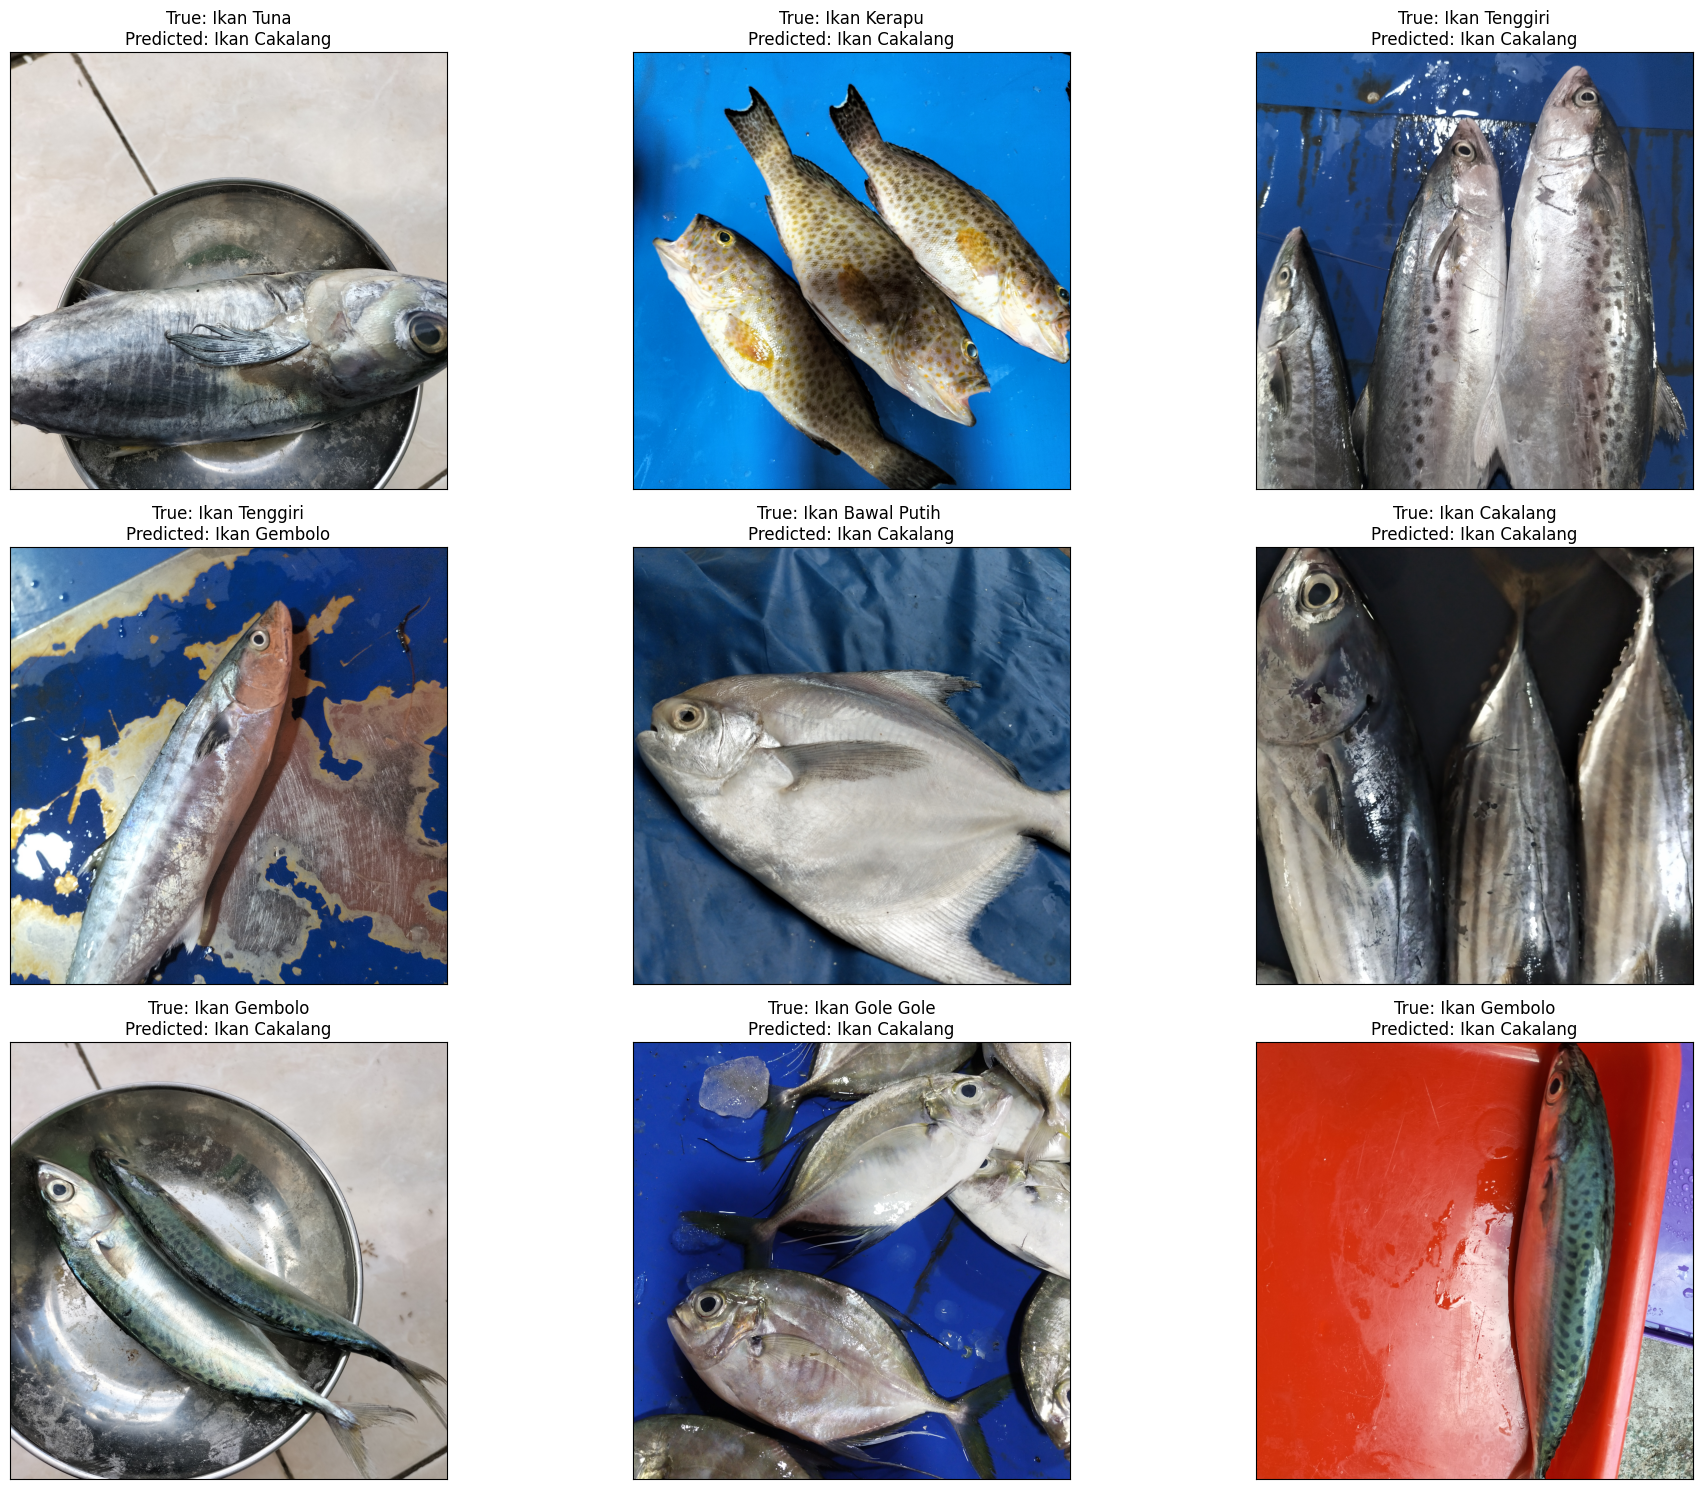

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# Save Model

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/BANGKIT 2023/"
PROJECT_NAME = "Ensemble Model"
SAVE_MODEL_NAME = "model_Resnet50_versi2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model_resnet50.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/BANGKIT 2023/Ensemble Model/model_Resnet50_versi2.h5...


# Predict new data

# Load Data Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/BANGKIT 2023/Ensemble Model/model_Resnet50_versi2.h5')

In [ ]:
model.compile(
    optimizer='adam',  # Or whatever optimizer you want
    loss='categorical_crossentropy',  # Or whatever loss function is appropriate for your problem
    metrics=['accuracy']  # Or whatever metrics you want to track
)

In [ ]:
import os
os.chdir('/content')

Saving IMG_20230517_075841.jpg to IMG_20230517_075841 (1).jpg
1/1 [==============================] - 2s 2s/step
Predicted class: Ikan Cakalang
[[0.04991499 0.1353744  0.14200664 0.13300318 0.05236609 0.07003765
  0.10877079 0.08337909 0.0947886  0.13035858]]


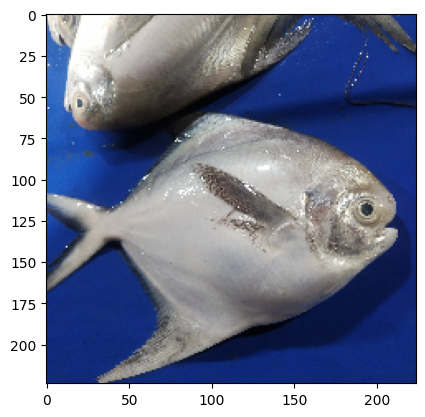

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)
# Make the prediction
predictions = model.predict(img_array)

# Find the class with the highest predicted probability
predicted_class = np.argmax(predictions[0])

# Print the predicted class
class_names = ['Ikan Bawal Putih', 'Ikan Belato', 'Ikan Cakalang', 'Ikan Gembolo', 'Ikan Gole Gole','Ikan Kakap Merah', 'Ikan Kembung', 'Ikan Kerapu', 'Ikan Tenggiri', 'Ikan Tuna']
print('Predicted class:', class_names[predicted_class])

print(predictions)
# Show the image
plt.imshow(img)
plt.show()
